### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)#to make all columns visible

#### Import Data

In [2]:
df = pd.read_csv('churn_practise.csv')

In [3]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

### EDA

In [5]:
def normal(col):
    print('No of unique values:\t', df[col].nunique())
    print('Values Count:\n',df[col].value_counts())

In [6]:
def percent_cat(col):
    groupped = df.groupby([col])['Churn?'].value_counts()
    y=0
    for i in groupped.index:
        total_val = len(df[df[col]==i[0]])
        print(f'Percent of {i[1]} Churn of {i[0]} customers in column {col} is {round((groupped[i]/total_val)*100,2)}%')
        y+=1
        if y==2:
            print('\n')
            y=0

In [7]:
def insight(col):
    plt.figure(figsize = (16,8))
    ax = sns.countplot(x = df[col], hue = df['Churn?'])

    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+13))

In [8]:
normal('State')

No of unique values:	 51
Values Count:
 WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
MI     73
VT     73
ID     73
UT     72
TX     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     68
CO     66
WA     66
NV     66
RI     65
MS     65
MA     65
AZ     64
MO     63
FL     63
ND     62
ME     62
NM     62
DE     61
OK     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64


<AxesSubplot:xlabel='Account Length', ylabel='Density'>

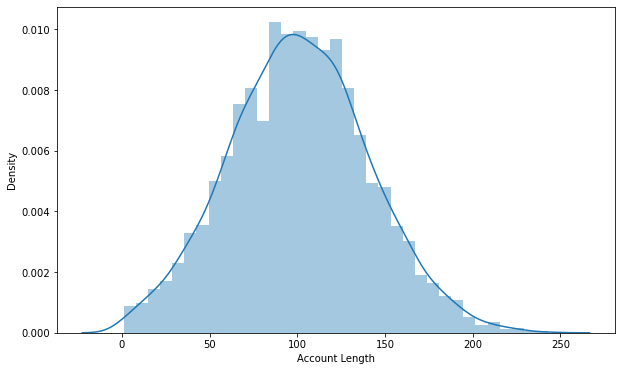

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df['Account Length'])

In [18]:
normal('Area Code')

No of unique values:	 3
Values Count:
 415    1655
510     840
408     838
Name: Area Code, dtype: int64


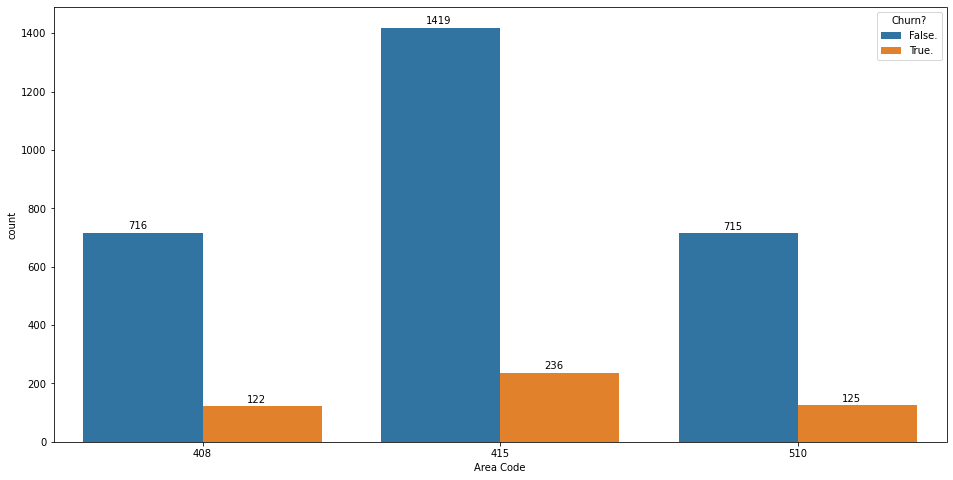

In [19]:
insight('Area Code')

In [24]:
percent_cat('Area Code')

Percent of False. Churn of 408 customers in column Area Code is 85.44%
Percent of True. Churn of 408 customers in column Area Code is 14.56%


Percent of False. Churn of 415 customers in column Area Code is 85.74%
Percent of True. Churn of 415 customers in column Area Code is 14.26%


Percent of False. Churn of 510 customers in column Area Code is 85.12%
Percent of True. Churn of 510 customers in column Area Code is 14.88%




In [28]:
df['Phone'].nunique()
#Unique phone numbr

3333

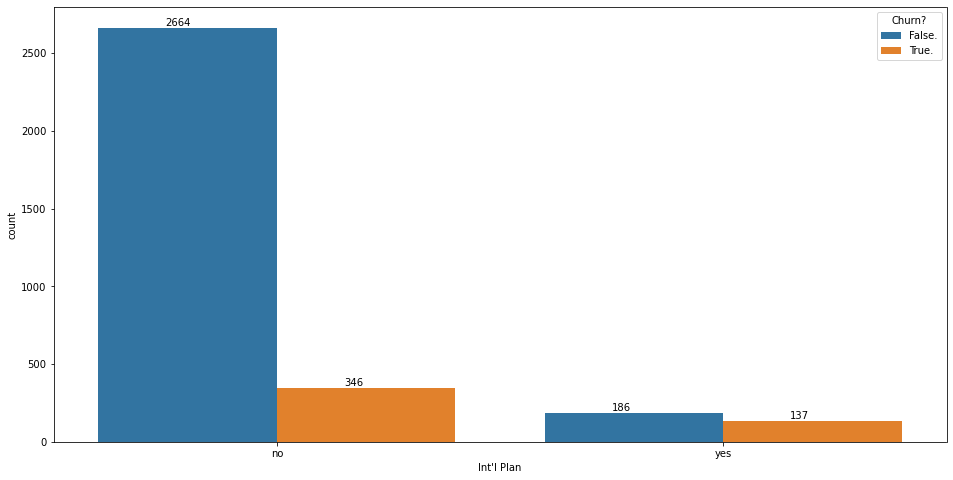

In [33]:
insight('Int\'l Plan')

In [34]:
percent_cat('Int\'l Plan')
#International plan customers are the more percent in churn

Percent of False. Churn of no customers in column Int'l Plan is 88.5%
Percent of True. Churn of no customers in column Int'l Plan is 11.5%


Percent of False. Churn of yes customers in column Int'l Plan is 57.59%
Percent of True. Churn of yes customers in column Int'l Plan is 42.41%




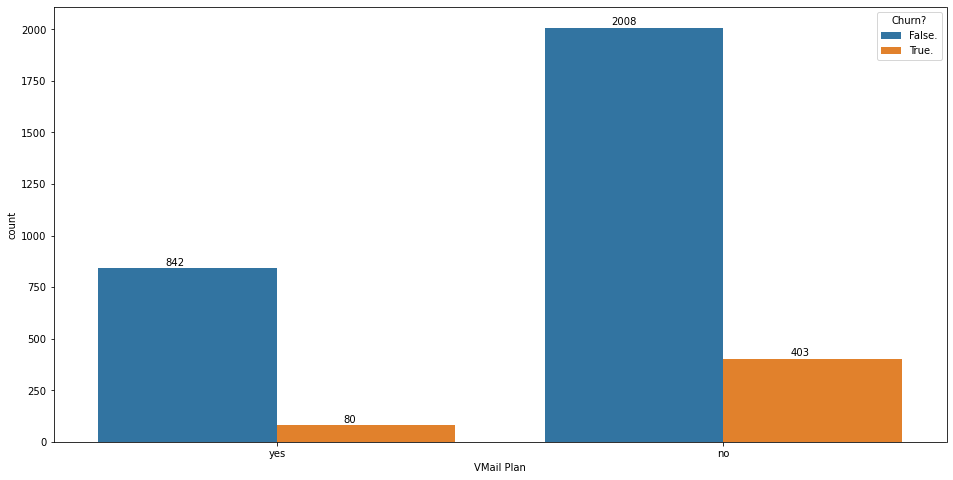

In [35]:
insight('VMail Plan')

In [36]:
percent_cat('VMail Plan')

Percent of False. Churn of no customers in column VMail Plan is 83.28%
Percent of True. Churn of no customers in column VMail Plan is 16.72%


Percent of False. Churn of yes customers in column VMail Plan is 91.32%
Percent of True. Churn of yes customers in column VMail Plan is 8.68%




In [50]:
normal('VMail Plan')

No of unique values:	 2
Values Count:
 no     2411
yes     922
Name: VMail Plan, dtype: int64


<Figure size 1440x1440 with 0 Axes>

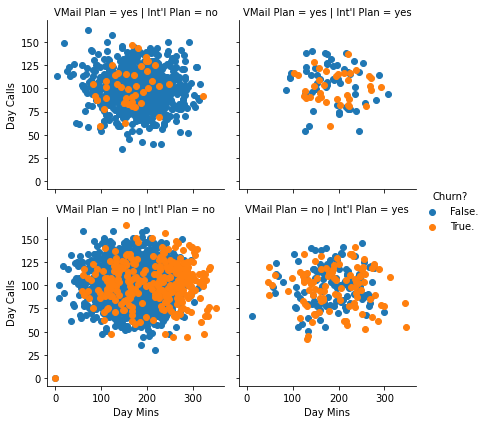

In [45]:
g = sns.FacetGrid(data=df,  row='VMail Plan', col='Int\'l Plan', hue='Churn?')

g = g.map(plt.scatter , 'Day Mins', 'Day Calls').add_legend();

In [49]:
normal('VMail Message')
#VMail plan Yes customers get mail message.

No of unique values:	 46
Values Count:
 0     2411
31      60
29      53
28      51
33      46
30      44
27      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
14       7
44       7
18       7
12       6
45       6
13       4
46       4
47       3
50       2
11       2
9        2
48       2
8        2
4        1
10       1
49       1
51       1
Name: VMail Message, dtype: int64


<AxesSubplot:xlabel='Day Mins', ylabel='Density'>

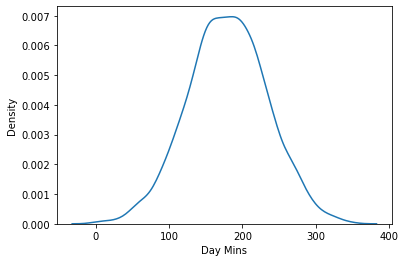

In [53]:
sns.kdeplot(df['Day Mins'])

<AxesSubplot:xlabel='Day Calls', ylabel='Density'>

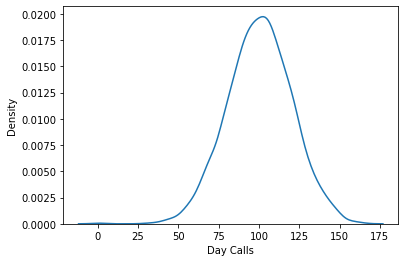

In [55]:
sns.kdeplot(df['Day Calls'])

<AxesSubplot:xlabel='Day Charge', ylabel='Day Mins'>

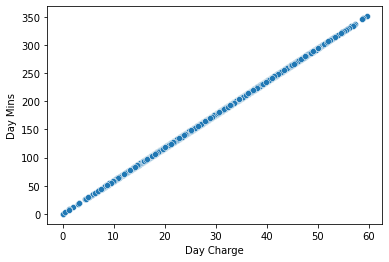

In [57]:
sns.scatterplot(x=df['Day Charge'], y=df['Day Mins'])

In [16]:
df['Per_min_Day_Charge']=df['Day Mins']/df['Day Charge']

In [18]:
df['Per_min_Day_Charge'].describe()
#Per min charge for all calls are nearly 5-6 units

count    3331.000000
mean        5.882241
std         0.000960
min         5.864662
25%         5.881773
50%         5.882209
75%         5.882730
max         5.909091
Name: Per_min_Day_Charge, dtype: float64

<AxesSubplot:xlabel='Eve Mins', ylabel='Density'>

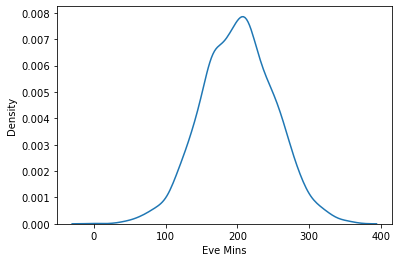

In [81]:
sns.kdeplot(df['Eve Mins'])
#Evening calls speaking minutes are higher compared to Day calls

<AxesSubplot:xlabel='Eve Calls', ylabel='Density'>

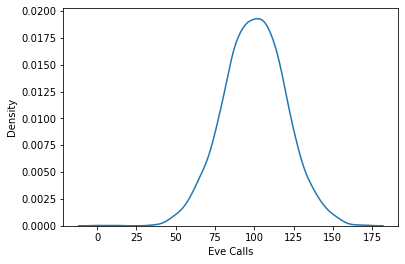

In [82]:
sns.kdeplot(df['Eve Calls'])

<AxesSubplot:xlabel='Eve Charge', ylabel='Eve Mins'>

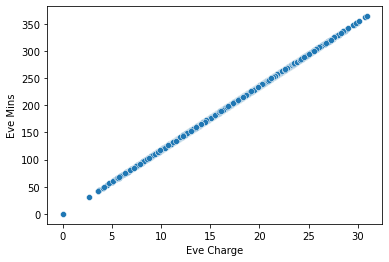

In [85]:
sns.scatterplot(x=df['Eve Charge'], y=df['Eve Mins'])

In [19]:
df['Eve Mins']/df['Eve Charge']
#Per mins charge for evening calls are costlier than day call

0       11.764005
1       11.762936
2       11.766990
3       11.768061
4       11.760508
          ...    
3328    11.763100
3329    11.763804
3330    11.763747
3331    11.761238
3332    11.765487
Length: 3333, dtype: float64

<AxesSubplot:xlabel='Night Mins', ylabel='Density'>

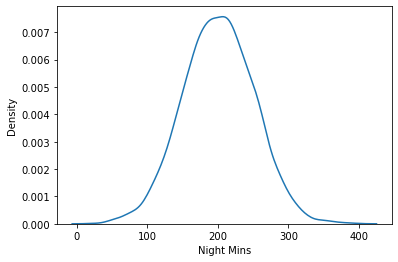

In [86]:
sns.kdeplot(df['Night Mins'])

In [89]:
df['Night Mins']/df['Night Charge']
#Night calls are the costliest

0       22.225250
1       22.218341
2       22.213115
3       22.223476
4       22.223543
          ...    
3328    22.221338
3329    22.218351
3330    22.210648
3331    22.236422
3332    22.228361
Length: 3333, dtype: float64

<AxesSubplot:xlabel='Intl Mins', ylabel='Density'>

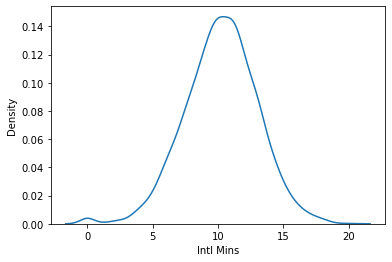

In [91]:
sns.kdeplot(df['Intl Mins'])

<AxesSubplot:xlabel='Intl Calls', ylabel='Density'>

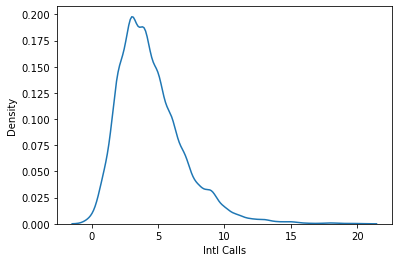

In [92]:
sns.kdeplot(df['Intl Calls'])

In [20]:
df['Intl_charge']=df['Intl Mins']/df['Intl Charge']

In [101]:
normal('CustServ Calls')

No of unique values:	 10
Values Count:
 1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
8       2
9       2
Name: CustServ Calls, dtype: int64


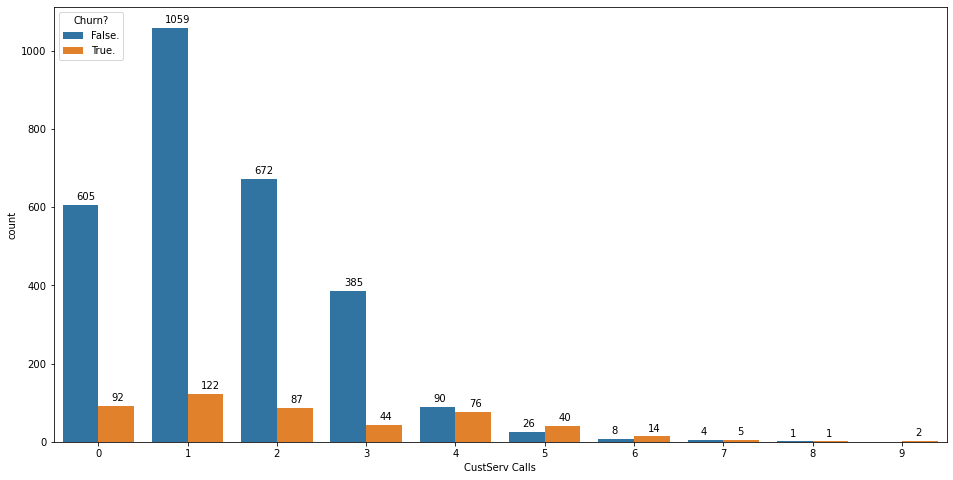

In [102]:
insight('CustServ Calls')

In [103]:
percent_cat('CustServ Calls')

Percent of False. Churn of 0 customers in column CustServ Calls is 86.8%
Percent of True. Churn of 0 customers in column CustServ Calls is 13.2%


Percent of False. Churn of 1 customers in column CustServ Calls is 89.67%
Percent of True. Churn of 1 customers in column CustServ Calls is 10.33%


Percent of False. Churn of 2 customers in column CustServ Calls is 88.54%
Percent of True. Churn of 2 customers in column CustServ Calls is 11.46%


Percent of False. Churn of 3 customers in column CustServ Calls is 89.74%
Percent of True. Churn of 3 customers in column CustServ Calls is 10.26%


Percent of False. Churn of 4 customers in column CustServ Calls is 54.22%
Percent of True. Churn of 4 customers in column CustServ Calls is 45.78%


Percent of True. Churn of 5 customers in column CustServ Calls is 60.61%
Percent of False. Churn of 5 customers in column CustServ Calls is 39.39%


Percent of True. Churn of 6 customers in column CustServ Calls is 63.64%
Percent of False. Churn of 6 custom

**Observation**
* Customers who have made Cust Serv calls more than 4 have lead to churn.

In [104]:
corr = df.corr()

<AxesSubplot:>

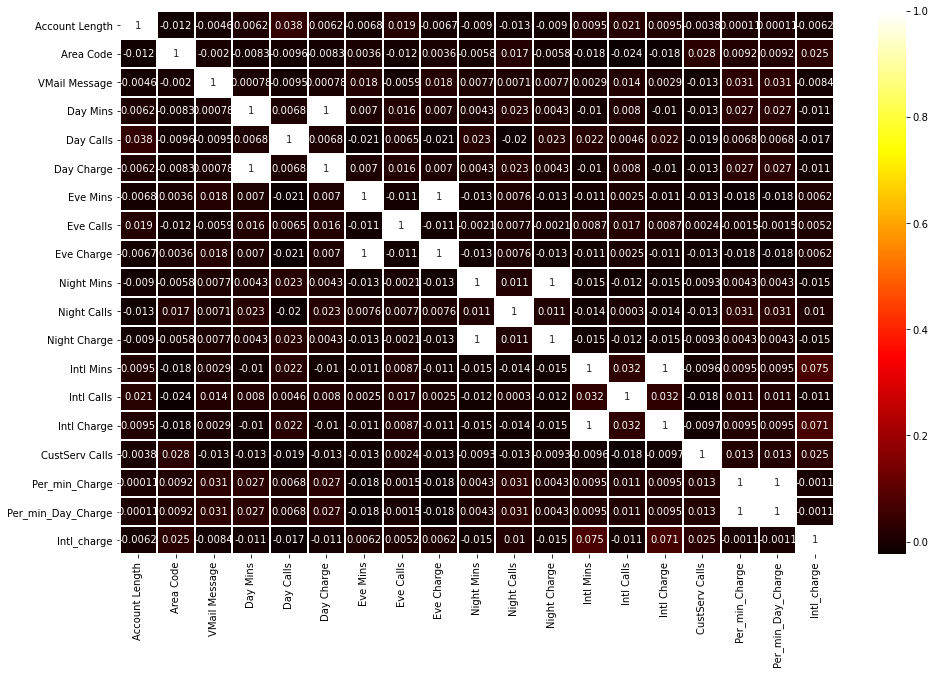

In [107]:
plt.figure(figsize=(16,10))
sns.heatmap(corr, linewidths=1, linecolor='w', annot=True, cmap='hot')

**Observations**
* There is multi collinearrity between some variables, we have to remove those columns.

### Encoding

In [21]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?', 'Per_min_Day_Charge', 'Intl_charge'],
      dtype='object')

In [23]:
df1 = df.drop(['Day Mins','Eve Mins', 'VMail Plan','Night Mins','Intl Mins','Per_min_Day_Charge','Phone','Intl_charge'], axis=1)

In [24]:
df1['Churn?'] = np.where (df1['Churn?']=='False.',0,1)

In [25]:
df1.head()

,State,Account Length,Area Code,Int'l Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,no,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,415,no,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,415,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,408,yes,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,415,yes,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [26]:
cat_col=df1.select_dtypes(exclude=np.number).columns

In [27]:
df_one = pd.get_dummies(df1, columns=cat_col)

df_one.head()

,Account Length,Area Code,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,Churn?,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Int'l Plan_no,Int'l Plan_yes
0,128,415,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,107,415,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,137,415,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,84,408,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,75,415,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
def label(col):
    le = LabelEncoder()
    le.fit(df1[col])
    df1[col] = le.transform(df1[col])

In [29]:
sc = StandardScaler()

df_scale = pd.DataFrame(sc.fit_transform(df_one.drop('Churn?', axis=1)), columns=df_one.columns[:-1])

In [30]:
df_scale.head()

,Account Length,Area Code,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,Churn?,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Int'l Plan_no
0,0.676489,-0.523603,1.234883,0.476643,1.567036,-0.055940,-0.070427,-0.465494,0.866029,-0.601195,-0.085690,-0.427932,-0.125892,-0.156821,-0.129532,-0.139921,-0.101519,-0.142134,-0.150686,-0.128329,-0.136539,-0.138802,-0.128329,-0.127116,-0.115663,-0.149642,-0.133079,-0.147532,6.827466,-0.134241,-0.124657,-0.141031,-0.146467,-0.137675,-0.149642,-0.160792,-0.138802,-0.141031,-0.144315,-0.144315,-0.137675,-0.136539,-0.130724,-0.144315,-0.137675,-0.142134,-0.159808,-0.154800,-0.136539,-0.1548,-0.116988,-0.141031,-0.135395,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,0.327580,-0.327580
1,0.149065,-0.523603,1.307948,1.124503,-0.334013,0.144867,-0.107549,0.147825,1.059390,-0.601195,1.241169,-0.427932,-0.125892,-0.156821,-0.129532,-0.139921,-0.101519,-0.142134,-0.150686,-0.128329,-0.136539,-0.138802,-0.128329,-0.127116,-0.115663,-0.149642,-0.133079,-0.147532,-0.146467,-0.134241,-0.124657,-0.141031,-0.146467,-0.137675,-0.149642,-0.160792,-0.138802,-0.141031,-0.144315,-0.144315,-0.137675,-0.136539,-0.130724,-0.144315,-0.137675,-0.142134,-0.159808,6.459936,-0.136539,-0.1548,-0.116988,-0.141031,-0.135395,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,0.327580,-0.327580
2,0.902529,-0.523603,-0.591760,0.675985,1.168464,0.496279,-1.573900,0.198935,-0.755571,0.211534,0.697156,-1.188218,-0.125892,-0.156821,-0.129532,-0.139921,-0.101519,-0.142134,-0.150686,-0.128329,-0.136539,-0.138802,-0.128329,-0.127116,-0.115663,-0.149642,-0.133079,-0.147532,-0.146467,-0.134241,-0.124657,-0.141031,-0.146467,-0.137675,-0.149642,-0.160792,-0.138802,-0.141031,-0.144315,-0.144315,-0.137675,-0.136539,-0.130724,6.929264,-0.137675,-0.142134,-0.159808,-0.154800,-0.136539,-0.1548,-0.116988,-0.141031,-0.135395,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,0.327580,-0.327580
3,-0.428590,-0.688834,-0.591760,-1.466936,2.196759,-0.608159,-2.743268,-0.567714,-0.078806,1.024263,-1.306401,0.332354,-0.125892,-0.156821,-0.129532,-0.139921,-0.101519,-0.142134,-0.150686,-0.128329,-0.136539,-0.138802,-0.128329,-0.127116,-0.115663,-0.149642,-0.133079,-0.147532,-0.146467,-0.134241,-0.124657,-0.141031,-0.146467,-0.137675,-0.149642,-0.160792,-0.138802,-0.141031,-0.144315,-0.144315,-0.137675,-0.136539,-0.130724,-0.144315,-0.137675,-0.142134,-0.159808,6.459936,-0.136539,-0.1548,-0.116988,-0.141031,-0.135395,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-3.052685,3.052685
4,-0.654629,-0.523603,-0.591760,0.626149,-0.240041,1.098699,-1.037939,1.067803,-0.276562,-0.601195,-0.045885,1.092641,-0.125892,-0.156821,-0.129532,-0.139921,-0.101519,-0.142134,-0.150686,-0.128329,-0.136539,-0.138802,-0.128329,-0.127116,-0.115663,-0.149642,-0.133079,-0.147532,-0.146467,-0.134241,-0.124657,-0.141031,-0.146467,-0.137675,-0.149642,-0.160792,-0.138802,-0.141031,-0.144315,-0.144315,-0.137675,-0.136539,-0.130724,-0.144315,-0.137675,-0.142134,-0.159808,-0.154800,7.323889,-0.1548,-0.116988,-0.141031,-0.135395,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-3.052685,3.052685


In [31]:
for i in cat_col:
    label(i)

<AxesSubplot:>

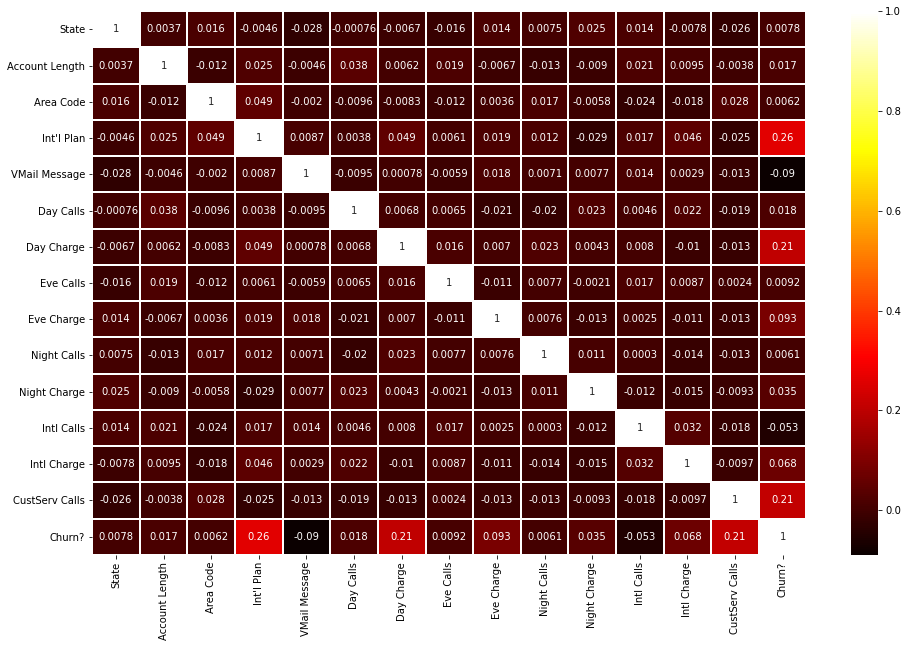

In [32]:
plt.figure(figsize=(16,10))
sns.heatmap(df1.corr(), linewidths=1, linecolor='w', annot=True, cmap='hot')

### Train Test Split

In [33]:
X = df1.drop('Churn?',axis=1)

y = df1['Churn?']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
X_o = df_scale

y_o = df1['Churn?']

In [36]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, test_size=0.3, random_state=101)

### Modelling

In [37]:
def metrics(y_true, y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))


def predictions(model,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
        model.fit(X_train, y_train)
        #predictions
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        plot_roc_curve(model, X_train, y_train)
        plt.show()
        actual = [y_train, y_test]
        pred = [train_pred, test_pred]
        for i in range(0,2):
            if i==0:
                print('----Train Metrics----')
            else:
                print('----Test Metrics----')
            metrics(actual[i], pred[i])

In [191]:
lg = LogisticRegression()

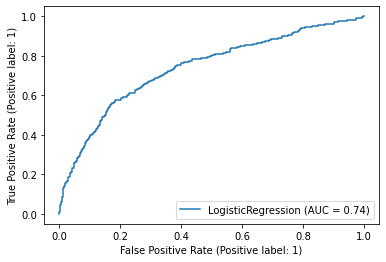

----Train Metrics----
Confusion Matrix:
 [[1957   24]
 [ 313   39]]


Accuracy Score:
 0.8555507929704244


Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1981
           1       0.62      0.11      0.19       352

    accuracy                           0.86      2333
   macro avg       0.74      0.55      0.55      2333
weighted avg       0.83      0.86      0.81      2333

----Test Metrics----
Confusion Matrix:
 [[862   7]
 [122   9]]


Accuracy Score:
 0.871


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       869
           1       0.56      0.07      0.12       131

    accuracy                           0.87      1000
   macro avg       0.72      0.53      0.53      1000
weighted avg       0.83      0.87      0.82      1000



In [156]:
predictions(lg)

In [197]:
y_test_o

3047   -0.411672
3021   -0.411672
1671   -0.411672
1612   -0.411672
1428   -0.411672
          ...   
260    -0.411672
352    -0.411672
2087   -0.411672
1535   -0.411672
1292   -0.411672
Name: Churn?, Length: 1000, dtype: float64

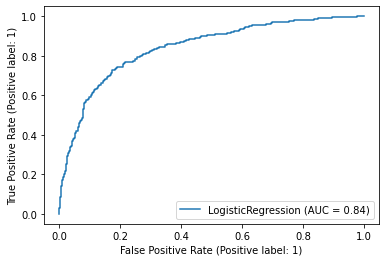

----Train Metrics----
Confusion Matrix:
 [[1922   59]
 [ 243  109]]


Accuracy Score:
 0.8705529361337334


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1981
           1       0.65      0.31      0.42       352

    accuracy                           0.87      2333
   macro avg       0.77      0.64      0.67      2333
weighted avg       0.85      0.87      0.85      2333

----Test Metrics----
Confusion Matrix:
 [[833  36]
 [105  26]]


Accuracy Score:
 0.859


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       869
           1       0.42      0.20      0.27       131

    accuracy                           0.86      1000
   macro avg       0.65      0.58      0.60      1000
weighted avg       0.83      0.86      0.84      1000



In [205]:
predictions(lg,X_train_o, X_test_o, y_train_o, y_test_o)

#### KNN

In [157]:
knn = KNeighborsClassifier()

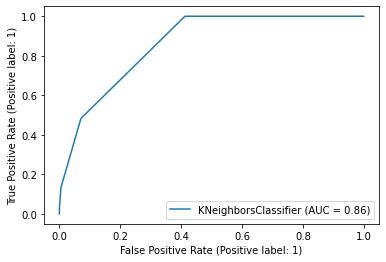

----Train Metrics----
Confusion Matrix:
 [[1971   10]
 [ 305   47]]


Accuracy Score:
 0.8649807115302186


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93      1981
           1       0.82      0.13      0.23       352

    accuracy                           0.86      2333
   macro avg       0.85      0.56      0.58      2333
weighted avg       0.86      0.86      0.82      2333

----Test Metrics----
Confusion Matrix:
 [[854  15]
 [125   6]]


Accuracy Score:
 0.86


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       869
           1       0.29      0.05      0.08       131

    accuracy                           0.86      1000
   macro avg       0.58      0.51      0.50      1000
weighted avg       0.80      0.86      0.81      1000



In [158]:
predictions(knn)

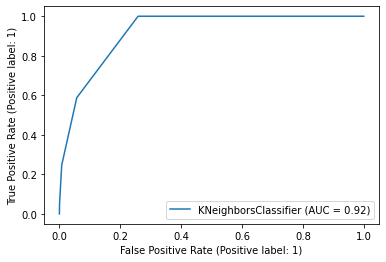

----Train Metrics----
Confusion Matrix:
 [[1966   15]
 [ 265   87]]


Accuracy Score:
 0.8799828546935277


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1981
           1       0.85      0.25      0.38       352

    accuracy                           0.88      2333
   macro avg       0.87      0.62      0.66      2333
weighted avg       0.88      0.88      0.85      2333

----Test Metrics----
Confusion Matrix:
 [[850  19]
 [117  14]]


Accuracy Score:
 0.864


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       869
           1       0.42      0.11      0.17       131

    accuracy                           0.86      1000
   macro avg       0.65      0.54      0.55      1000
weighted avg       0.82      0.86      0.83      1000



In [206]:
predictions(knn,X_train_o, X_test_o, y_train_o, y_test_o)

### Naive Bayes

In [159]:
nb = GaussianNB()

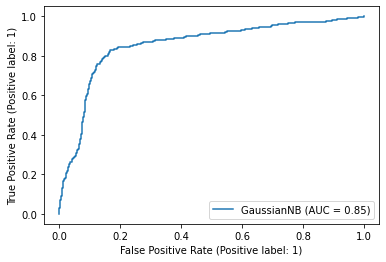

----Train Metrics----
Confusion Matrix:
 [[1837  144]
 [ 208  144]]


Accuracy Score:
 0.8491213030432919


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      1981
           1       0.50      0.41      0.45       352

    accuracy                           0.85      2333
   macro avg       0.70      0.67      0.68      2333
weighted avg       0.84      0.85      0.84      2333

----Test Metrics----
Confusion Matrix:
 [[793  76]
 [ 79  52]]


Accuracy Score:
 0.845


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       869
           1       0.41      0.40      0.40       131

    accuracy                           0.84      1000
   macro avg       0.66      0.65      0.66      1000
weighted avg       0.84      0.84      0.84      1000



In [160]:
predictions(nb)

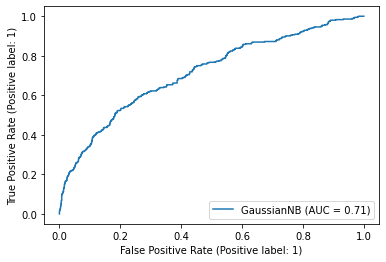

----Train Metrics----
Confusion Matrix:
 [[1207  774]
 [ 111  241]]


Accuracy Score:
 0.6206600942991856


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.61      0.73      1981
           1       0.24      0.68      0.35       352

    accuracy                           0.62      2333
   macro avg       0.58      0.65      0.54      2333
weighted avg       0.81      0.62      0.67      2333

----Test Metrics----
Confusion Matrix:
 [[498 371]
 [ 55  76]]


Accuracy Score:
 0.574


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.57      0.70       869
           1       0.17      0.58      0.26       131

    accuracy                           0.57      1000
   macro avg       0.54      0.58      0.48      1000
weighted avg       0.80      0.57      0.64      1000



In [207]:
predictions(nb,X_train_o, X_test_o, y_train_o, y_test_o)

### Decision Tree

In [161]:
dtree = DecisionTreeClassifier()

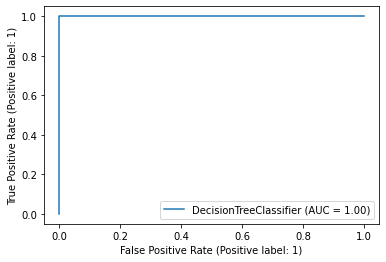

----Train Metrics----
Confusion Matrix:
 [[1981    0]
 [   0  352]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      1.00      1.00       352

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333

----Test Metrics----
Confusion Matrix:
 [[798  71]
 [ 41  90]]


Accuracy Score:
 0.888


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       869
           1       0.56      0.69      0.62       131

    accuracy                           0.89      1000
   macro avg       0.76      0.80      0.78      1000
weighted avg       0.90      0.89      0.89      1000



In [162]:
predictions(dtree)

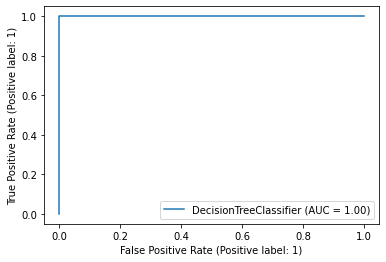

----Train Metrics----
Confusion Matrix:
 [[1981    0]
 [   0  352]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      1.00      1.00       352

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333

----Test Metrics----
Confusion Matrix:
 [[804  65]
 [ 43  88]]


Accuracy Score:
 0.892


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       869
           1       0.58      0.67      0.62       131

    accuracy                           0.89      1000
   macro avg       0.76      0.80      0.78      1000
weighted avg       0.90      0.89      0.90      1000



In [208]:
predictions(dtree,X_train_o, X_test_o, y_train_o, y_test_o)

### Bagging

In [163]:
bag = BaggingClassifier()

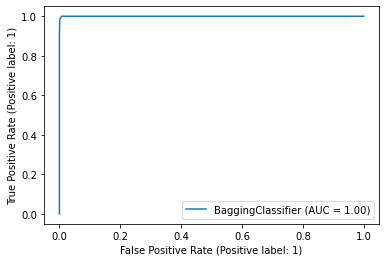

----Train Metrics----
Confusion Matrix:
 [[1980    1]
 [  20  332]]


Accuracy Score:
 0.9909987141020146


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1981
           1       1.00      0.94      0.97       352

    accuracy                           0.99      2333
   macro avg       0.99      0.97      0.98      2333
weighted avg       0.99      0.99      0.99      2333

----Test Metrics----
Confusion Matrix:
 [[847  22]
 [ 40  91]]


Accuracy Score:
 0.938


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       869
           1       0.81      0.69      0.75       131

    accuracy                           0.94      1000
   macro avg       0.88      0.83      0.86      1000
weighted avg       0.94      0.94      0.94      1000



In [164]:
predictions(bag)

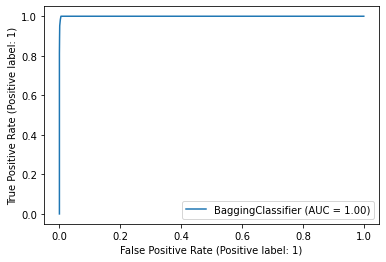

----Train Metrics----
Confusion Matrix:
 [[1979    2]
 [  17  335]]


Accuracy Score:
 0.9918559794256322


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.99      0.95      0.97       352

    accuracy                           0.99      2333
   macro avg       0.99      0.98      0.98      2333
weighted avg       0.99      0.99      0.99      2333

----Test Metrics----
Confusion Matrix:
 [[853  16]
 [ 41  90]]


Accuracy Score:
 0.943


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       869
           1       0.85      0.69      0.76       131

    accuracy                           0.94      1000
   macro avg       0.90      0.83      0.86      1000
weighted avg       0.94      0.94      0.94      1000



In [209]:
predictions(bag,X_train_o, X_test_o, y_train_o, y_test_o)

### Random Forest

In [165]:
rf = RandomForestClassifier()

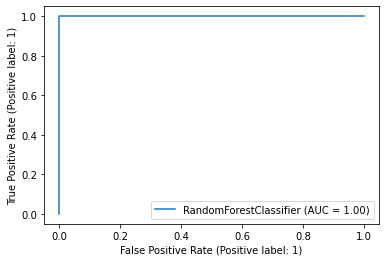

----Train Metrics----
Confusion Matrix:
 [[1981    0]
 [   0  352]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      1.00      1.00       352

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333

----Test Metrics----
Confusion Matrix:
 [[860   9]
 [ 48  83]]


Accuracy Score:
 0.943


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       869
           1       0.90      0.63      0.74       131

    accuracy                           0.94      1000
   macro avg       0.92      0.81      0.86      1000
weighted avg       0.94      0.94      0.94      1000



In [166]:
predictions(rf)

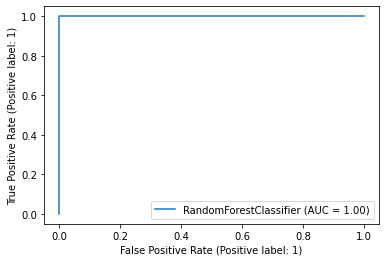

----Train Metrics----
Confusion Matrix:
 [[1981    0]
 [   0  352]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      1.00      1.00       352

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333

----Test Metrics----
Confusion Matrix:
 [[864   5]
 [ 60  71]]


Accuracy Score:
 0.935


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       869
           1       0.93      0.54      0.69       131

    accuracy                           0.94      1000
   macro avg       0.93      0.77      0.82      1000
weighted avg       0.93      0.94      0.93      1000



In [210]:
predictions(rf,X_train_o, X_test_o, y_train_o, y_test_o)

### Ada boost

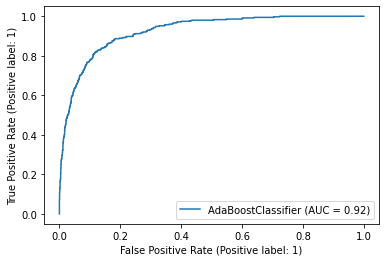

----Train Metrics----
Confusion Matrix:
 [[1935   46]
 [ 182  170]]


Accuracy Score:
 0.9022717531075868


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1981
           1       0.79      0.48      0.60       352

    accuracy                           0.90      2333
   macro avg       0.85      0.73      0.77      2333
weighted avg       0.89      0.90      0.89      2333

----Test Metrics----
Confusion Matrix:
 [[825  44]
 [ 83  48]]


Accuracy Score:
 0.873


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       869
           1       0.52      0.37      0.43       131

    accuracy                           0.87      1000
   macro avg       0.72      0.66      0.68      1000
weighted avg       0.86      0.87      0.86      1000



In [167]:
ada = AdaBoostClassifier()

predictions(ada)

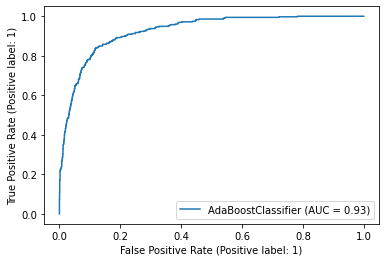

----Train Metrics----
Confusion Matrix:
 [[1930   51]
 [ 183  169]]


Accuracy Score:
 0.8996999571367338


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1981
           1       0.77      0.48      0.59       352

    accuracy                           0.90      2333
   macro avg       0.84      0.73      0.77      2333
weighted avg       0.89      0.90      0.89      2333

----Test Metrics----
Confusion Matrix:
 [[831  38]
 [ 81  50]]


Accuracy Score:
 0.881


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       869
           1       0.57      0.38      0.46       131

    accuracy                           0.88      1000
   macro avg       0.74      0.67      0.69      1000
weighted avg       0.87      0.88      0.87      1000



In [211]:
predictions(ada,X_train_o, X_test_o, y_train_o, y_test_o)

### Gradient Boost

In [168]:
gb = GradientBoostingClassifier()

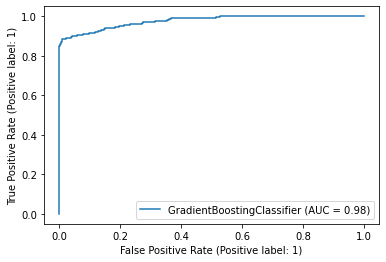

----Train Metrics----
Confusion Matrix:
 [[1981    0]
 [  58  294]]


Accuracy Score:
 0.9751393056150879


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1981
           1       1.00      0.84      0.91       352

    accuracy                           0.98      2333
   macro avg       0.99      0.92      0.95      2333
weighted avg       0.98      0.98      0.97      2333

----Test Metrics----
Confusion Matrix:
 [[852  17]
 [ 40  91]]


Accuracy Score:
 0.943


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       869
           1       0.84      0.69      0.76       131

    accuracy                           0.94      1000
   macro avg       0.90      0.84      0.86      1000
weighted avg       0.94      0.94      0.94      1000



In [169]:
predictions(gb)

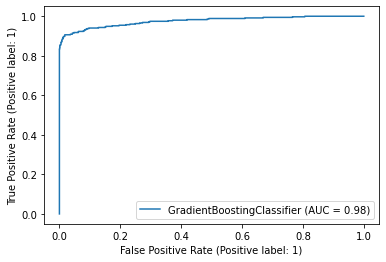

----Train Metrics----
Confusion Matrix:
 [[1980    1]
 [  58  294]]


Accuracy Score:
 0.9747106729532791


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1981
           1       1.00      0.84      0.91       352

    accuracy                           0.97      2333
   macro avg       0.98      0.92      0.95      2333
weighted avg       0.98      0.97      0.97      2333

----Test Metrics----
Confusion Matrix:
 [[854  15]
 [ 39  92]]


Accuracy Score:
 0.946


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       869
           1       0.86      0.70      0.77       131

    accuracy                           0.95      1000
   macro avg       0.91      0.84      0.87      1000
weighted avg       0.94      0.95      0.94      1000



In [212]:
predictions(gb,X_train_o, X_test_o, y_train_o, y_test_o)

### XG Boost

In [170]:
xg = XGBClassifier()

[19:35:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


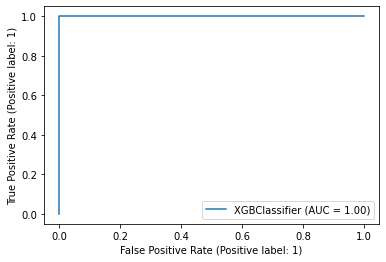

----Train Metrics----
Confusion Matrix:
 [[1981    0]
 [   0  352]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      1.00      1.00       352

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333

----Test Metrics----
Confusion Matrix:
 [[853  16]
 [ 37  94]]


Accuracy Score:
 0.947


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       869
           1       0.85      0.72      0.78       131

    accuracy                           0.95      1000
   macro avg       0.91      0.85      0.87      1000
weighted avg       0.94      0.95      0.95      1000



In [171]:
predictions(xg)

[19:49:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


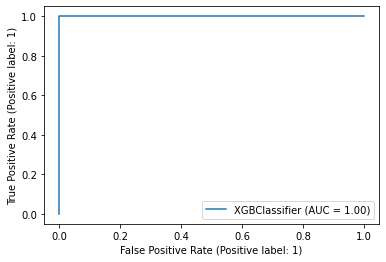

----Train Metrics----
Confusion Matrix:
 [[1981    0]
 [   0  352]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      1.00      1.00       352

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333

----Test Metrics----
Confusion Matrix:
 [[856  13]
 [ 40  91]]


Accuracy Score:
 0.947


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       869
           1       0.88      0.69      0.77       131

    accuracy                           0.95      1000
   macro avg       0.92      0.84      0.87      1000
weighted avg       0.94      0.95      0.94      1000



In [215]:
predictions(xg,X_train_o, X_test_o, y_train_o, y_test_o)

### Light GBM 

In [216]:
light = LGBMClassifier()

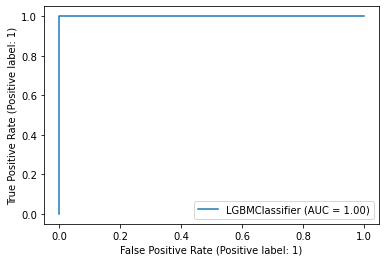

----Train Metrics----
Confusion Matrix:
 [[1981    0]
 [   0  352]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      1.00      1.00       352

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333

----Test Metrics----
Confusion Matrix:
 [[856  13]
 [ 34  97]]


Accuracy Score:
 0.953


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       869
           1       0.88      0.74      0.80       131

    accuracy                           0.95      1000
   macro avg       0.92      0.86      0.89      1000
weighted avg       0.95      0.95      0.95      1000



In [173]:
predictions(light)

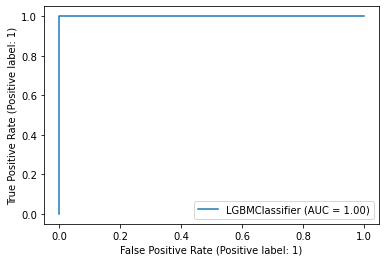

----Train Metrics----
Confusion Matrix:
 [[1981    0]
 [   0  352]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      1.00      1.00       352

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333

----Test Metrics----
Confusion Matrix:
 [[855  14]
 [ 37  94]]


Accuracy Score:
 0.949


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       869
           1       0.87      0.72      0.79       131

    accuracy                           0.95      1000
   macro avg       0.91      0.85      0.88      1000
weighted avg       0.95      0.95      0.95      1000



In [217]:
predictions(light,X_train_o, X_test_o, y_train_o, y_test_o)

### Cat boost

In [174]:
cat = CatBoostClassifier()

Learning rate set to 0.014792
0:	learn: 0.6761873	total: 73.4ms	remaining: 1m 13s
1:	learn: 0.6605334	total: 76.8ms	remaining: 38.3s
2:	learn: 0.6454863	total: 80.7ms	remaining: 26.8s
3:	learn: 0.6304313	total: 84ms	remaining: 20.9s
4:	learn: 0.6195174	total: 87.5ms	remaining: 17.4s
5:	learn: 0.6056127	total: 90.8ms	remaining: 15s
6:	learn: 0.5930461	total: 94.2ms	remaining: 13.4s
7:	learn: 0.5827719	total: 97.5ms	remaining: 12.1s
8:	learn: 0.5724434	total: 101ms	remaining: 11.1s
9:	learn: 0.5616330	total: 105ms	remaining: 10.4s
10:	learn: 0.5532696	total: 108ms	remaining: 9.71s
11:	learn: 0.5443991	total: 111ms	remaining: 9.18s
12:	learn: 0.5368783	total: 113ms	remaining: 8.6s
13:	learn: 0.5262879	total: 117ms	remaining: 8.21s
14:	learn: 0.5167248	total: 120ms	remaining: 7.88s
15:	learn: 0.5076903	total: 123ms	remaining: 7.58s
16:	learn: 0.4995976	total: 126ms	remaining: 7.31s
17:	learn: 0.4931308	total: 130ms	remaining: 7.08s
18:	learn: 0.4828732	total: 133ms	remaining: 6.88s
19:	lea

211:	learn: 0.1636435	total: 916ms	remaining: 3.4s
212:	learn: 0.1633411	total: 921ms	remaining: 3.4s
213:	learn: 0.1629390	total: 924ms	remaining: 3.39s
214:	learn: 0.1627158	total: 927ms	remaining: 3.39s
215:	learn: 0.1624370	total: 931ms	remaining: 3.38s
216:	learn: 0.1622328	total: 934ms	remaining: 3.37s
217:	learn: 0.1619544	total: 937ms	remaining: 3.36s
218:	learn: 0.1616291	total: 941ms	remaining: 3.35s
219:	learn: 0.1612234	total: 944ms	remaining: 3.35s
220:	learn: 0.1611153	total: 948ms	remaining: 3.34s
221:	learn: 0.1607833	total: 953ms	remaining: 3.34s
222:	learn: 0.1604174	total: 958ms	remaining: 3.34s
223:	learn: 0.1600748	total: 961ms	remaining: 3.33s
224:	learn: 0.1597247	total: 964ms	remaining: 3.32s
225:	learn: 0.1593694	total: 967ms	remaining: 3.31s
226:	learn: 0.1592989	total: 973ms	remaining: 3.31s
227:	learn: 0.1589797	total: 976ms	remaining: 3.31s
228:	learn: 0.1585830	total: 980ms	remaining: 3.3s
229:	learn: 0.1583313	total: 982ms	remaining: 3.29s
230:	learn: 0.1

408:	learn: 0.1262232	total: 1.81s	remaining: 2.61s
409:	learn: 0.1260716	total: 1.81s	remaining: 2.61s
410:	learn: 0.1259368	total: 1.82s	remaining: 2.61s
411:	learn: 0.1257367	total: 1.83s	remaining: 2.61s
412:	learn: 0.1254831	total: 1.83s	remaining: 2.6s
413:	learn: 0.1253732	total: 1.84s	remaining: 2.6s
414:	learn: 0.1252475	total: 1.84s	remaining: 2.6s
415:	learn: 0.1251978	total: 1.85s	remaining: 2.6s
416:	learn: 0.1251106	total: 1.86s	remaining: 2.6s
417:	learn: 0.1250372	total: 1.86s	remaining: 2.59s
418:	learn: 0.1247981	total: 1.87s	remaining: 2.59s
419:	learn: 0.1245941	total: 1.88s	remaining: 2.59s
420:	learn: 0.1245536	total: 1.88s	remaining: 2.59s
421:	learn: 0.1244482	total: 1.89s	remaining: 2.59s
422:	learn: 0.1243620	total: 1.9s	remaining: 2.59s
423:	learn: 0.1242157	total: 1.9s	remaining: 2.58s
424:	learn: 0.1241671	total: 1.9s	remaining: 2.58s
425:	learn: 0.1240052	total: 1.91s	remaining: 2.57s
426:	learn: 0.1239690	total: 1.91s	remaining: 2.57s
427:	learn: 0.123786

577:	learn: 0.1082306	total: 2.52s	remaining: 1.84s
578:	learn: 0.1081148	total: 2.53s	remaining: 1.84s
579:	learn: 0.1080142	total: 2.54s	remaining: 1.84s
580:	learn: 0.1078266	total: 2.54s	remaining: 1.83s
581:	learn: 0.1078057	total: 2.54s	remaining: 1.83s
582:	learn: 0.1077797	total: 2.55s	remaining: 1.82s
583:	learn: 0.1076365	total: 2.55s	remaining: 1.82s
584:	learn: 0.1074803	total: 2.56s	remaining: 1.81s
585:	learn: 0.1073253	total: 2.56s	remaining: 1.81s
586:	learn: 0.1073005	total: 2.57s	remaining: 1.81s
587:	learn: 0.1072136	total: 2.57s	remaining: 1.8s
588:	learn: 0.1071642	total: 2.58s	remaining: 1.8s
589:	learn: 0.1070022	total: 2.58s	remaining: 1.79s
590:	learn: 0.1068659	total: 2.58s	remaining: 1.79s
591:	learn: 0.1067464	total: 2.59s	remaining: 1.78s
592:	learn: 0.1066203	total: 2.59s	remaining: 1.78s
593:	learn: 0.1064663	total: 2.6s	remaining: 1.77s
594:	learn: 0.1063765	total: 2.6s	remaining: 1.77s
595:	learn: 0.1063659	total: 2.61s	remaining: 1.77s
596:	learn: 0.10

752:	learn: 0.0918821	total: 3.27s	remaining: 1.07s
753:	learn: 0.0918679	total: 3.27s	remaining: 1.07s
754:	learn: 0.0918338	total: 3.28s	remaining: 1.06s
755:	learn: 0.0917714	total: 3.28s	remaining: 1.06s
756:	learn: 0.0917137	total: 3.28s	remaining: 1.05s
757:	learn: 0.0916490	total: 3.29s	remaining: 1.05s
758:	learn: 0.0916273	total: 3.29s	remaining: 1.04s
759:	learn: 0.0915386	total: 3.29s	remaining: 1.04s
760:	learn: 0.0915237	total: 3.3s	remaining: 1.03s
761:	learn: 0.0914562	total: 3.3s	remaining: 1.03s
762:	learn: 0.0913673	total: 3.31s	remaining: 1.03s
763:	learn: 0.0912828	total: 3.31s	remaining: 1.02s
764:	learn: 0.0912079	total: 3.32s	remaining: 1.02s
765:	learn: 0.0911497	total: 3.32s	remaining: 1.01s
766:	learn: 0.0911275	total: 3.33s	remaining: 1.01s
767:	learn: 0.0909784	total: 3.33s	remaining: 1.01s
768:	learn: 0.0909664	total: 3.34s	remaining: 1s
769:	learn: 0.0909089	total: 3.35s	remaining: 999ms
770:	learn: 0.0908260	total: 3.35s	remaining: 995ms
771:	learn: 0.090

910:	learn: 0.0785976	total: 3.83s	remaining: 374ms
911:	learn: 0.0784945	total: 3.84s	remaining: 371ms
912:	learn: 0.0783982	total: 3.85s	remaining: 367ms
913:	learn: 0.0783046	total: 3.85s	remaining: 362ms
914:	learn: 0.0782564	total: 3.85s	remaining: 358ms
915:	learn: 0.0781798	total: 3.86s	remaining: 354ms
916:	learn: 0.0781401	total: 3.87s	remaining: 351ms
917:	learn: 0.0780239	total: 3.88s	remaining: 347ms
918:	learn: 0.0778515	total: 3.89s	remaining: 343ms
919:	learn: 0.0778358	total: 3.9s	remaining: 339ms
920:	learn: 0.0777249	total: 3.9s	remaining: 335ms
921:	learn: 0.0776808	total: 3.91s	remaining: 331ms
922:	learn: 0.0775567	total: 3.91s	remaining: 326ms
923:	learn: 0.0775049	total: 3.92s	remaining: 322ms
924:	learn: 0.0774040	total: 3.92s	remaining: 318ms
925:	learn: 0.0773642	total: 3.93s	remaining: 314ms
926:	learn: 0.0772418	total: 3.94s	remaining: 310ms
927:	learn: 0.0771678	total: 3.95s	remaining: 306ms
928:	learn: 0.0770753	total: 3.95s	remaining: 302ms
929:	learn: 0.

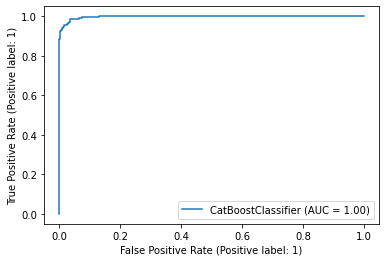

----Train Metrics----
Confusion Matrix:
 [[1980    1]
 [  41  311]]


Accuracy Score:
 0.9819974282040291


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1981
           1       1.00      0.88      0.94       352

    accuracy                           0.98      2333
   macro avg       0.99      0.94      0.96      2333
weighted avg       0.98      0.98      0.98      2333

----Test Metrics----
Confusion Matrix:
 [[860   9]
 [ 33  98]]


Accuracy Score:
 0.958


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       869
           1       0.92      0.75      0.82       131

    accuracy                           0.96      1000
   macro avg       0.94      0.87      0.90      1000
weighted avg       0.96      0.96      0.96      1000



In [175]:
predictions(cat)

Learning rate set to 0.014792
0:	learn: 0.6803223	total: 6.19ms	remaining: 6.19s
1:	learn: 0.6646365	total: 10ms	remaining: 4.99s
2:	learn: 0.6499210	total: 13.7ms	remaining: 4.56s
3:	learn: 0.6377728	total: 17.6ms	remaining: 4.37s
4:	learn: 0.6225943	total: 21.3ms	remaining: 4.23s
5:	learn: 0.6109433	total: 25.1ms	remaining: 4.16s
6:	learn: 0.6004824	total: 30ms	remaining: 4.25s
7:	learn: 0.5919159	total: 33.8ms	remaining: 4.19s
8:	learn: 0.5817125	total: 37.6ms	remaining: 4.14s
9:	learn: 0.5722359	total: 44.3ms	remaining: 4.39s
10:	learn: 0.5622935	total: 47.9ms	remaining: 4.31s
11:	learn: 0.5541853	total: 50.4ms	remaining: 4.14s
12:	learn: 0.5463260	total: 54.1ms	remaining: 4.11s
13:	learn: 0.5362845	total: 57.9ms	remaining: 4.08s
14:	learn: 0.5251852	total: 61.5ms	remaining: 4.04s
15:	learn: 0.5162535	total: 64.8ms	remaining: 3.99s
16:	learn: 0.5060601	total: 68.3ms	remaining: 3.95s
17:	learn: 0.4964239	total: 72.6ms	remaining: 3.96s
18:	learn: 0.4868120	total: 76ms	remaining: 3.92

190:	learn: 0.1703142	total: 746ms	remaining: 3.16s
191:	learn: 0.1699390	total: 750ms	remaining: 3.16s
192:	learn: 0.1694775	total: 754ms	remaining: 3.15s
193:	learn: 0.1690799	total: 757ms	remaining: 3.15s
194:	learn: 0.1687307	total: 763ms	remaining: 3.15s
195:	learn: 0.1682635	total: 772ms	remaining: 3.17s
196:	learn: 0.1678304	total: 778ms	remaining: 3.17s
197:	learn: 0.1673986	total: 782ms	remaining: 3.17s
198:	learn: 0.1670023	total: 788ms	remaining: 3.17s
199:	learn: 0.1666766	total: 793ms	remaining: 3.17s
200:	learn: 0.1663159	total: 797ms	remaining: 3.17s
201:	learn: 0.1659097	total: 800ms	remaining: 3.16s
202:	learn: 0.1656847	total: 804ms	remaining: 3.16s
203:	learn: 0.1653322	total: 808ms	remaining: 3.15s
204:	learn: 0.1649440	total: 811ms	remaining: 3.15s
205:	learn: 0.1648640	total: 815ms	remaining: 3.14s
206:	learn: 0.1644678	total: 818ms	remaining: 3.13s
207:	learn: 0.1641968	total: 822ms	remaining: 3.13s
208:	learn: 0.1639394	total: 827ms	remaining: 3.13s
209:	learn: 

354:	learn: 0.1358939	total: 1.63s	remaining: 2.95s
355:	learn: 0.1357375	total: 1.63s	remaining: 2.95s
356:	learn: 0.1355804	total: 1.63s	remaining: 2.94s
357:	learn: 0.1353557	total: 1.64s	remaining: 2.94s
358:	learn: 0.1352648	total: 1.64s	remaining: 2.93s
359:	learn: 0.1351794	total: 1.65s	remaining: 2.93s
360:	learn: 0.1350495	total: 1.65s	remaining: 2.92s
361:	learn: 0.1348886	total: 1.66s	remaining: 2.92s
362:	learn: 0.1346586	total: 1.66s	remaining: 2.91s
363:	learn: 0.1345382	total: 1.66s	remaining: 2.9s
364:	learn: 0.1343746	total: 1.67s	remaining: 2.9s
365:	learn: 0.1342822	total: 1.67s	remaining: 2.9s
366:	learn: 0.1339940	total: 1.68s	remaining: 2.89s
367:	learn: 0.1338007	total: 1.68s	remaining: 2.89s
368:	learn: 0.1336128	total: 1.69s	remaining: 2.89s
369:	learn: 0.1334130	total: 1.69s	remaining: 2.88s
370:	learn: 0.1333444	total: 1.7s	remaining: 2.88s
371:	learn: 0.1332975	total: 1.71s	remaining: 2.88s
372:	learn: 0.1332129	total: 1.71s	remaining: 2.88s
373:	learn: 0.13

516:	learn: 0.1166506	total: 2.55s	remaining: 2.38s
517:	learn: 0.1165886	total: 2.56s	remaining: 2.38s
518:	learn: 0.1165054	total: 2.56s	remaining: 2.38s
519:	learn: 0.1163825	total: 2.57s	remaining: 2.37s
520:	learn: 0.1162855	total: 2.57s	remaining: 2.37s
521:	learn: 0.1162378	total: 2.58s	remaining: 2.36s
522:	learn: 0.1161957	total: 2.58s	remaining: 2.35s
523:	learn: 0.1160585	total: 2.59s	remaining: 2.35s
524:	learn: 0.1160147	total: 2.59s	remaining: 2.35s
525:	learn: 0.1158981	total: 2.6s	remaining: 2.34s
526:	learn: 0.1157712	total: 2.6s	remaining: 2.34s
527:	learn: 0.1157081	total: 2.61s	remaining: 2.33s
528:	learn: 0.1155975	total: 2.61s	remaining: 2.33s
529:	learn: 0.1155032	total: 2.63s	remaining: 2.33s
530:	learn: 0.1154562	total: 2.64s	remaining: 2.33s
531:	learn: 0.1154124	total: 2.64s	remaining: 2.33s
532:	learn: 0.1152808	total: 2.65s	remaining: 2.32s
533:	learn: 0.1152103	total: 2.66s	remaining: 2.32s
534:	learn: 0.1151073	total: 2.67s	remaining: 2.32s
535:	learn: 0.

717:	learn: 0.1005388	total: 3.5s	remaining: 1.37s
718:	learn: 0.1005007	total: 3.5s	remaining: 1.37s
719:	learn: 0.1004307	total: 3.51s	remaining: 1.36s
720:	learn: 0.1004096	total: 3.52s	remaining: 1.36s
721:	learn: 0.1002665	total: 3.52s	remaining: 1.35s
722:	learn: 0.1002125	total: 3.53s	remaining: 1.35s
723:	learn: 0.1001695	total: 3.54s	remaining: 1.35s
724:	learn: 0.1000930	total: 3.55s	remaining: 1.34s
725:	learn: 0.0999934	total: 3.56s	remaining: 1.34s
726:	learn: 0.0998521	total: 3.58s	remaining: 1.34s
727:	learn: 0.0998230	total: 3.59s	remaining: 1.34s
728:	learn: 0.0997825	total: 3.6s	remaining: 1.34s
729:	learn: 0.0997024	total: 3.61s	remaining: 1.34s
730:	learn: 0.0996682	total: 3.65s	remaining: 1.34s
731:	learn: 0.0996323	total: 3.65s	remaining: 1.34s
732:	learn: 0.0995588	total: 3.66s	remaining: 1.33s
733:	learn: 0.0994911	total: 3.66s	remaining: 1.33s
734:	learn: 0.0994427	total: 3.67s	remaining: 1.32s
735:	learn: 0.0993900	total: 3.68s	remaining: 1.32s
736:	learn: 0.0

885:	learn: 0.0884483	total: 4.45s	remaining: 572ms
886:	learn: 0.0884227	total: 4.45s	remaining: 567ms
887:	learn: 0.0883314	total: 4.46s	remaining: 562ms
888:	learn: 0.0882599	total: 4.46s	remaining: 557ms
889:	learn: 0.0881986	total: 4.47s	remaining: 552ms
890:	learn: 0.0881568	total: 4.47s	remaining: 547ms
891:	learn: 0.0881110	total: 4.5s	remaining: 545ms
892:	learn: 0.0879728	total: 4.51s	remaining: 540ms
893:	learn: 0.0879310	total: 4.51s	remaining: 535ms
894:	learn: 0.0879046	total: 4.52s	remaining: 531ms
895:	learn: 0.0877807	total: 4.53s	remaining: 526ms
896:	learn: 0.0877430	total: 4.54s	remaining: 521ms
897:	learn: 0.0876970	total: 4.54s	remaining: 516ms
898:	learn: 0.0875959	total: 4.55s	remaining: 511ms
899:	learn: 0.0875318	total: 4.55s	remaining: 506ms
900:	learn: 0.0874820	total: 4.56s	remaining: 501ms
901:	learn: 0.0873615	total: 4.57s	remaining: 496ms
902:	learn: 0.0873042	total: 4.58s	remaining: 492ms
903:	learn: 0.0872420	total: 4.58s	remaining: 487ms
904:	learn: 0

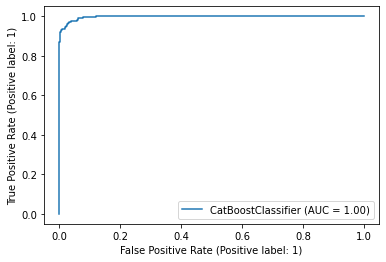

----Train Metrics----
Confusion Matrix:
 [[1981    0]
 [  46  306]]


Accuracy Score:
 0.9802828975567939


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1981
           1       1.00      0.87      0.93       352

    accuracy                           0.98      2333
   macro avg       0.99      0.93      0.96      2333
weighted avg       0.98      0.98      0.98      2333

----Test Metrics----
Confusion Matrix:
 [[861   8]
 [ 33  98]]


Accuracy Score:
 0.959


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       869
           1       0.92      0.75      0.83       131

    accuracy                           0.96      1000
   macro avg       0.94      0.87      0.90      1000
weighted avg       0.96      0.96      0.96      1000



In [218]:
predictions(cat,X_train_o, X_test_o, y_train_o, y_test_o)

### SVM

In [38]:
from sklearn.svm import SVC

In [39]:
svc = SVC()

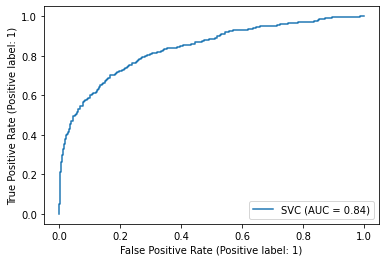

----Train Metrics----
Confusion Matrix:
 [[1981    0]
 [ 352    0]]


Accuracy Score:
 0.8491213030432919


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1981
           1       0.00      0.00      0.00       352

    accuracy                           0.85      2333
   macro avg       0.42      0.50      0.46      2333
weighted avg       0.72      0.85      0.78      2333

----Test Metrics----
Confusion Matrix:
 [[869   0]
 [131   0]]


Accuracy Score:
 0.869


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       869
           1       0.00      0.00      0.00       131

    accuracy                           0.87      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.76      0.87      0.81      1000



In [40]:
predictions(svc)

In [41]:
c = [1, 0.25, 0.5, 0.75]
kernels = ['linear', 'rbf']
gammas = ['auto', 0.01, 0.001, 1]

In [43]:
grid = GridSearchCV(estimator= svc, 
                    param_grid=dict(kernel=kernels, C=c, gamma = gammas), verbose=3,cv=5, n_jobs=-1)

In [44]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 0.25, 0.5, 0.75],
                         'gamma': ['auto', 0.01, 0.001, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [46]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}